## Análise sobre aeronaves
Nesse primeiro momento estou com o objetivo de apesar fazer analises de EDA com o banco de achei no site do governo, sobre aeronaves. Apesar de não ter conhecimento especifico do ramo resolvi estuda-lo.
Vendo a base de dados inicialmente já surgiram algumas perguntas, como por exemplo:
- Quais são os tipos de aeronaves que temos e a quantidade de cada uma delas?
- As nossas aeronaves são mais antigas ou mais novas (ano de fabricação)?
- Qual o trajeto mais realizado (origem - destino)?
- Temos alguma relação do tipo de aeronave e os defeitos? São recorrentes?
- É possível termos mais acidentes em trajetos especificos?

Essas foram algumas perguntas que pude ver com a base de dados. Com certeza se tivesse um conhecimento maior do ramo e da base de dados, poderia surgir outras hipoteses a serem testas.

Vou fazer essas análises iniciais e quem sabe outras dúvidas não apareça.
Inicialmente irei utilizar as base de dados aeronave e ocorrência que tem como relacionamento a variavel codigo_ocorrencia2

In [39]:
#Import librarys
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
os.chdir('C:\\Github\\Statistics\\Airplanes\\Dataset')

In [3]:
os.listdir()

['aeronave.csv', 'ocorrencia.csv']

In [4]:
#Load dataset
aeronave = pd.read_csv('aeronave.csv', encoding = "ISO-8859-1", sep = ";")
ocorrencia = pd.read_csv('ocorrencia.csv', encoding = "ISO-8859-1", sep = ";")

In [5]:
#Imprimi a quantidade de linhas e colunas dos datasets
print("aeronave: ", aeronave.shape, "ocorrencia: ", ocorrencia.shape, sep ="\n")

aeronave: 
(5307, 23)
ocorrencia: 
(5245, 22)


##### Inicialmente já podemos observar que temos mais registros na base de dados aeronave do que na ocorrencia

In [6]:
#Vamos ver quantos valores únicos temos da variavel codigo_ocorrencia2
print("valores únicos aeronave: ", aeronave.codigo_ocorrencia2.nunique(), "valores unicos ocorrencia: ", ocorrencia.codigo_ocorrencia2.nunique(), sep ="\n")

valores únicos aeronave: 
5245
valores unicos ocorrencia: 
5245


##### Bom, podemos ver que alguns valores se repetem na base aeronave e terão os mesmos resultados de ocorrencia. Como não montei a base não vou me apegar a isso, vou apenas tentar fazer uma exploração dos dados e tirar alguns insight deles.
##### Para isso irei fazer a "união" das duas bases.

In [7]:
df = pd.merge(aeronave, ocorrencia, on = 'codigo_ocorrencia2')

##### Após a união das bases, como esperado, temos a mesma informação para diferentes tipos de aeronave. Onde o resultado da ocorrência é igual para todas elas.
##### Pode ser que isso tenha um vies na nossa análise, mas irei considerar que não tenha para conseguir prosseguir com as análises. Ou então poderia retirar as informações duplicadas. Acho que assim ficará melhor para analisar

In [8]:
df.loc[df['codigo_ocorrencia2'] == 45689]

,codigo_ocorrencia2,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,...,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
1147,45689,PPKKA,TÁXI AÉREO,AVIÃO,EMBRAER,EMB-500,E50P,JATO,BIMOTOR,4750,...,17/02/2012,23:00:00,***,FINALIZADA,***,NÃO,NaN,0,3,NÃO
1148,45689,PPOFF,PARTICULAR,AVIÃO,CIRRUS DESIGN,SR22,SR22,PISTÃO,MONOMOTOR,1542,...,17/02/2012,23:00:00,***,FINALIZADA,***,NÃO,NaN,0,3,NÃO
1149,45689,PTOTG,PARTICULAR,AVIÃO,BEECH AIRCRAFT,C90A,BE9L,TURBOÉLICE,BIMOTOR,4694,...,17/02/2012,23:00:00,***,FINALIZADA,***,NÃO,NaN,0,3,NÃO


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5307 entries, 0 to 5306
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   codigo_ocorrencia2              5307 non-null   int64  
 1   aeronave_matricula              5307 non-null   object 
 2   aeronave_operador_categoria     5307 non-null   object 
 3   aeronave_tipo_veiculo           5307 non-null   object 
 4   aeronave_fabricante             5307 non-null   object 
 5   aeronave_modelo                 5307 non-null   object 
 6   aeronave_tipo_icao              5307 non-null   object 
 7   aeronave_motor_tipo             5307 non-null   object 
 8   aeronave_motor_quantidade       5307 non-null   object 
 9   aeronave_pmd                    5307 non-null   int64  
 10  aeronave_pmd_categoria          5307 non-null   int64  
 11  aeronave_assentos               5182 non-null   float64
 12  aeronave_ano_fabricacao         51

In [10]:
df = df.drop_duplicates('codigo_ocorrencia2')

In [11]:
df.shape

(5245, 44)

##### Pronto! Casos duplicados removidos. Agora vamos ver se temos dados em branco

In [12]:
df.isna().sum()

codigo_ocorrencia2                   0
aeronave_matricula                   0
aeronave_operador_categoria          0
aeronave_tipo_veiculo                0
aeronave_fabricante                  0
aeronave_modelo                      0
aeronave_tipo_icao                   0
aeronave_motor_tipo                  0
aeronave_motor_quantidade            0
aeronave_pmd                         0
aeronave_pmd_categoria               0
aeronave_assentos                  124
aeronave_ano_fabricacao            117
aeronave_pais_fabricante             0
aeronave_pais_registro               0
aeronave_registro_categoria          0
aeronave_registro_segmento           0
aeronave_voo_origem                  0
aeronave_voo_destino                 0
aeronave_fase_operacao               0
aeronave_tipo_operacao               0
aeronave_nivel_dano                  0
aeronave_fatalidades_total           0
codigo_ocorrencia                    0
codigo_ocorrencia1                   0
codigo_ocorrencia3       

##### Das perguntas iniciais que pensei em responder, apenas a variavel ano de fabricação que possui dados faltantes. As demais acredito que não fará diferença para as análises. Algumas dessas colunas que vejo que não irei utilizar irei deletar.

In [13]:
colunas_deletar = ['codigo_ocorrencia2', 'aeronave_matricula', 'aeronave_tipo_icao', 'aeronave_pmd',
                  'aeronave_pmd_categoria', 'aeronave_assentos', 'aeronave_pais_registro', 'aeronave_registro_categoria',
                  'aeronave_fase_operacao', 'aeronave_tipo_operacao', 'codigo_ocorrencia', 'codigo_ocorrencia1',
                  'codigo_ocorrencia3', 'codigo_ocorrencia4', 'ocorrencia_latitude', 'ocorrencia_longitude',
                  'ocorrencia_pais', 'ocorrencia_aerodromo', 'divulgacao_relatorio_numero', 'divulgacao_dia_publicacao',
                  'total_recomendacoes', 'total_aeronaves_envolvidas']

df = df.drop(columns = colunas_deletar)

In [14]:
df.shape

(5245, 22)

In [15]:
deletar_nan = df[df['aeronave_ano_fabricacao'].isna() == True]

df = df.drop(deletar_nan.index)

In [16]:
df.shape

(5128, 22)

In [17]:
df.isna().sum()

aeronave_operador_categoria         0
aeronave_tipo_veiculo               0
aeronave_fabricante                 0
aeronave_modelo                     0
aeronave_motor_tipo                 0
aeronave_motor_quantidade           0
aeronave_ano_fabricacao             0
aeronave_pais_fabricante            0
aeronave_registro_segmento          0
aeronave_voo_origem                 0
aeronave_voo_destino                0
aeronave_nivel_dano                 0
aeronave_fatalidades_total          0
ocorrencia_classificacao            0
ocorrencia_cidade                   0
ocorrencia_uf                       0
ocorrencia_dia                      0
ocorrencia_hora                     6
investigacao_aeronave_liberada    724
investigacao_status               339
divulgacao_relatorio_publicado      0
ocorrencia_saida_pista              0
dtype: int64

##### Com o decorrer das análise descrivitas será possível observar alguns valores que estão fora do padrão para aquela variável, em alguns casos conhecidos como outliers. Esses valores podem ocorrer por erro de digitação, por realmente não termos a informação daquela variavel, pode ser que o valor realmente seja aqueles ou outros fatores que podem ter ocasionado esse erro. Estas informações devem ser corrigidas antes de fazermos conclusões ou gerar algum modelo, seja estatístico ou de machine learning. Para essas correções é sempre bom analisar as informações com a pessoa com que está trabalhando, seja o engeheiro de dados ou o dono do negócio para entender o motivo do erro e se é possível corrigir. Mas no decorrer da análise será possível ver essas informações e aponta-las!  

##### Depois de todo esse processo agora temos as informações inicais onde poderemos responder as perguntar levantadas incialmente e talvez sugerir outras análises.

- Quais são os tipos de aeronaves que temos e a quantidade de cada uma delas?

Text(0.5, 1.0, 'Tipos de Aeronaves no Brasil')

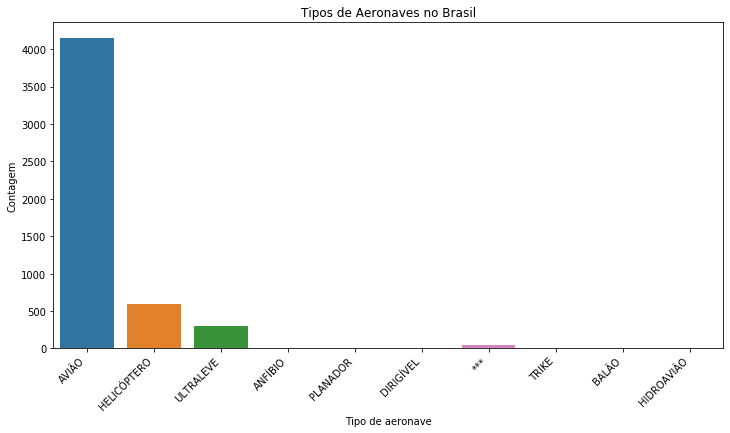

In [71]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'aeronave_tipo_veiculo', data = df)
plt.xticks(rotation=45, horizontalalignment='right')
plt.xlabel('Tipo de aeronave')
plt.ylabel('Contagem')
plt.title('Tipos de Aeronaves no Brasil')

##### Podemos observar que o maior tipo de aeronave que temos é o **avião**, cerca de 4 mil aeronaves, seguido do **helicóptero** e **ultraleve**.
##### Podemos verificar também que a quandidade de aviões é bem supeior aos demais tipos de aeronaves o que pode indicar que a maior parte das ocorrências podem ser com os aviões
##### Como mencionado anteriormente temos aeronaves identificadas como '***' que possívelmente deveríamos identificar o que ela representa. Será um erro de digitação?

- As nossas aeronaves são mais antigas ou mais novas (ano de fabricação)?

Text(0.5, 1.0, 'Ano de fabricação das Aeronaves')

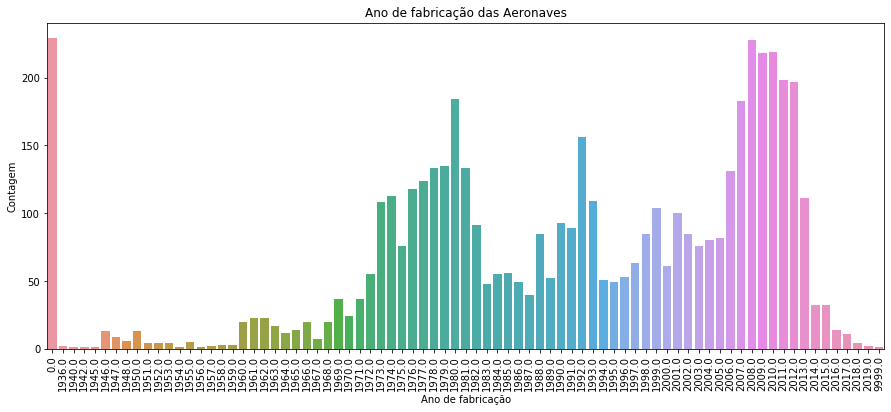

In [72]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'aeronave_ano_fabricacao', data = df)
plt.xticks(rotation = 90)
plt.xlabel('Ano de fabricação')
plt.ylabel('Contagem')
plt.title('Ano de fabricação das Aeronaves')

#####  Com o gráfico acima podemos notar picos e vales do ano de fabricação das aeronaves que são utilizadas no Brasil. A maioria delas são dos anos 70 e inicio dos anos 80, entre 1990 a 1993 e entre 2007 a 2014. Considerando Que essa análise está sendo feita em 2020 e supondo que uma aeronave é considera nova em até 10 anos de uso, a maior parte das nossas aeronaves são mais antigas. Como falei no ínicio, não entendo muito do assunto, mas vale fazer algumas reflexos sobre as análises que estamos fazendo.
##### É possível perceber que temos aeronaves antes dos anos 70 que vale a pergunta: "será que essas aeronaves ainda estão funcionando? Ou seja, executando viajens? Ou apenas estão em exposição". Caso estejam apenas em exposição, elas não deveriam não entrar para nosso estudo. Como não tenho como confirmar isso irei mante-las.

###### Com o gráfico foi possível perceber valores incomuns, como anod e fabricação '0.0 ou 9999.0'.

- Qual o trajeto mais realizado (origem - destino)?

##### Para respondermos essa pergunta, teremos que criar uma nova variável onde irá indicar origem e destino e depois conta-las

In [76]:
df['origem-destino'] = df['aeronave_voo_origem'] + " - " + df['aeronave_voo_destino']

In [81]:
df['origem-destino'].value_counts().head(20)

FORA DE AERODROMO - FORA DE AERODROMO                                            2560
*** - ***                                                                         157
CAMPO DE MARTE - CAMPO DE MARTE                                                    45
AEROPORTO ESTADUAL DE JUNDIAÍ - AEROPORTO ESTADUAL DE JUNDIAÍ                      27
GOVERNADOR JOSÉ RICHA - GOVERNADOR JOSÉ RICHA                                      22
ESTADUAL ARTHUR SIQUEIRA - ESTADUAL ARTHUR SIQUEIRA                                20
CARLOS PRATES - CARLOS PRATES                                                      18
AERÓDROMO NACIONAL DE AVIAÇÃO - AERÓDROMO NACIONAL DE AVIAÇÃO                      17
BACACHERI - BACACHERI                                                              16
PISTA DE POUSO EVENTUAL - PISTA DE POUSO EVENTUAL                                  15
PROFESSOR URBANO ERNESTO STUMPF - PROFESSOR URBANO ERNESTO STUMPF                  11
JACAREPAGUÁ - JACAREPAGUÁ                             

##### Mesmo com a criação desse nova variável não conseguiremos responder a pergunta de qual trajeto é mais realizado. Neste caso, deveríamos enter melhor a base e ver se isso faz sentido. Mas como não tenho como consultar vou para a próxima pergunta.

- Temos alguma relação do tipo de aeronave e os defeitos? São recorrentes?